In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# ✅ 1. Load the Data
orders = pd.read_csv(r'D:\Vivek katariya\Skills\data analyst\E-commerce data analysis project 1\List of Orders.csv')
order_details = pd.read_csv(r'D:\Vivek katariya\Skills\data analyst\E-commerce data analysis project 1\Order Details.csv')
targets = pd.read_csv(r'D:\Vivek katariya\Skills\data analyst\E-commerce data analysis project 1\Sales target.csv')

In [58]:
# ✅ 2. Clean Column Names
orders.columns = orders.columns.str.strip()
order_details.columns = order_details.columns.str.strip()
targets.columns = targets.columns.str.strip()

In [59]:
# 🔍 Print column names for debugging
print("🧾 Order Details Columns:", order_details.columns.tolist())

🧾 Order Details Columns: ['Order ID', 'Unit Price', 'Profit', 'Quantity', 'Category', 'Sub-Category']


In [60]:
# ✅ 3. Convert Order Date
orders['Order Date'] = pd.to_datetime(orders['Order Date'], dayfirst=True)

In [61]:
# ✅ 4. Identify correct columns for Unit Price and Quantity
unit_price_col = [col for col in order_details.columns if 'unit' in col.lower() and 'price' in col.lower()]
qty_col = [col for col in order_details.columns if 'quantity' in col.lower()]
print("🔍 Matched Unit Price column:", unit_price_col)
print("🔍 Matched Quantity column:", qty_col)

🔍 Matched Unit Price column: ['Unit Price']
🔍 Matched Quantity column: ['Quantity']


In [62]:
# ✅ 5. Calculate Total Price
if unit_price_col and qty_col:
    order_details['Total Price'] = order_details[unit_price_col[0]] * order_details[qty_col[0]]
else:
    raise KeyError("Could not find 'Unit Price' or 'Quantity' columns.")

In [63]:
# ✅ 6. Merge Orders with Details
df = pd.merge(order_details, orders, on='Order ID', how='inner')

In [64]:
# ✅ 7. Total Sales by Product
product_perf = df.groupby('Order ID')['Total Price'].sum().reset_index()
product_perf = product_perf.sort_values(by='Total Price', ascending=False)

In [65]:
# ✅ 8. Monthly Sales Trend
df['Month'] = df['Order Date'].dt.to_period('M')

# Create monthly_sales DataFrame
monthly_sales = df.groupby(['Order ID', 'Month'])['Total Price'].sum().reset_index()

# Convert Month from Period to string (for seaborn plotting)
monthly_sales['Month'] = monthly_sales['Month'].astype(str)


In [66]:
# ✅ 9. ABC Analysis
product_perf['Cumulative %'] = product_perf['Total Price'].cumsum() / product_perf['Total Price'].sum()
product_perf['ABC Category'] = pd.cut(product_perf['Cumulative %'], bins=[0, 0.2, 0.5, 1.0], labels=['A', 'B', 'C'])

In [67]:
# ✅ 10. Merge with Target
if 'Product Name' in targets.columns:
    perf_vs_target = pd.merge(product_perf, targets, on='Product Name', how='left')
else:
    perf_vs_target = product_perf.copy()

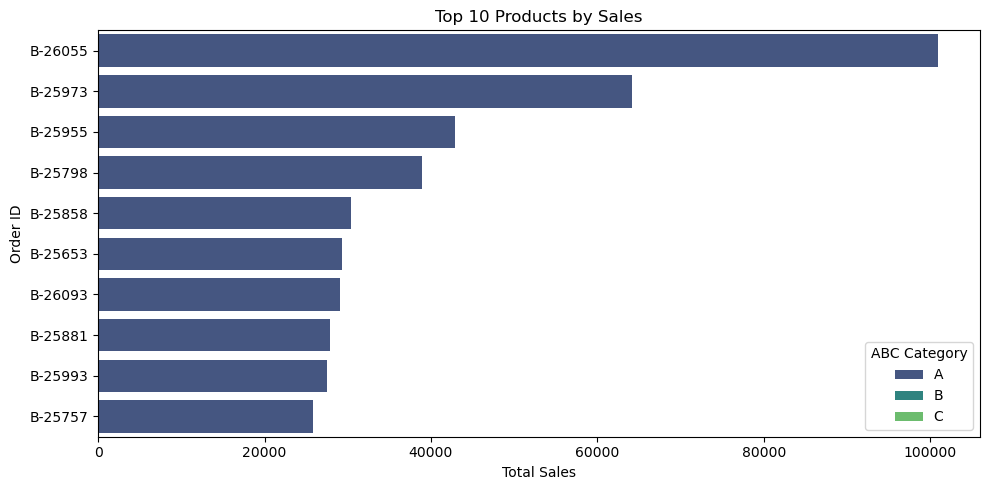

In [68]:
# ✅ 11. Visualizations

# 1. Top 10 Products
plt.figure(figsize=(10,5))
sns.barplot(data=product_perf.head(10), x='Total Price', hue='ABC Category', y='Order ID', palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Order ID')
plt.tight_layout()
plt.show()

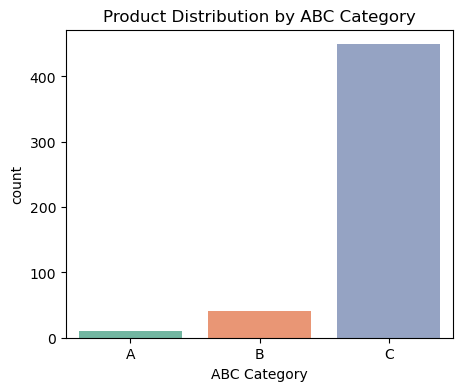

In [69]:
# 2. ABC Category Count
plt.figure(figsize=(5,4))
sns.countplot(data=product_perf, x='ABC Category',hue='ABC Category', palette='Set2')
plt.title('Product Distribution by ABC Category')
plt.show()

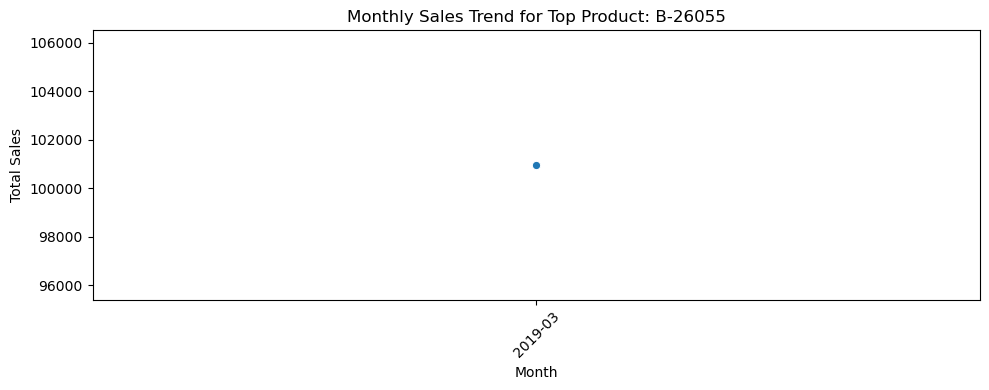

In [70]:
# 3. Monthly Trend for Top Product
top_product = product_perf.iloc[0]['Order ID']
top_trend = monthly_sales[monthly_sales['Order ID'] == top_product]

plt.figure(figsize=(10,4))
sns.lineplot(data=top_trend, x='Month', y='Total Price', marker='o')
plt.title(f'Monthly Sales Trend for Top Product: {top_product}')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()